In [2]:
import pandas as pd 
import sklearn 
from sklearn.linear_model import LinearRegression, Lasso, Ridge 
from sklearn.model_selection import train_test_split 
from sklearn.metrics import mean_squared_error 
import matplotlib.pyplot as plt
import numpy as np

In [3]:
df = pd.read_csv('supershops.csv')
df.head()

,Marketing Spend,Administration,Transport,Area,Profit
0,114523.61,136897.80,471784.10,Dhaka,192261.83
1,162597.70,151377.59,443898.53,Ctg,191792.06
2,153441.51,101145.55,407934.54,Rangpur,191050.39
3,144372.41,118671.85,383199.62,Dhaka,182901.99
4,142107.34,91391.77,366168.42,Rangpur,166187.94


In [4]:
#df = df.dropna()
df.dropna(inplace=True)

In [5]:
x = df.drop(['Profit','Area'], axis=1)

In [6]:
x.head()

,Marketing Spend,Administration,Transport
0,114523.61,136897.80,471784.10
1,162597.70,151377.59,443898.53
2,153441.51,101145.55,407934.54
3,144372.41,118671.85,383199.62
4,142107.34,91391.77,366168.42


In [7]:
y = df[['Profit']]
y.head()

,Profit
0,192261.83
1,191792.06
2,191050.39
3,182901.99
4,166187.94


In [8]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.25, random_state=1)

In [9]:
xtrain.shape

(36, 3)

In [10]:
xtrain.head()

,Marketing Spend,Administration,Transport
36,28663.76,127056.21,201126.82
20,76253.86,113867.30,298664.47
42,23640.93,96189.63,148001.11
37,44069.95,51283.14,197029.42
27,72107.60,127864.55,353183.81


In [11]:
ytrain.head()

,Profit
36,90708.19
20,118474.03
42,71498.49
37,89949.14
27,105008.31


In [12]:
train_combined = pd.concat([pd.DataFrame(xtrain), pd.DataFrame(ytrain, columns=['Profit'])], axis=1)
train_combined.corr()

,Marketing Spend,Administration,Transport,Profit
Marketing Spend,1.000000,0.306074,0.737333,0.921507
Administration,0.306074,1.000000,0.131321,0.298704
Transport,0.737333,0.131321,1.000000,0.825700
Profit,0.921507,0.298704,0.825700,1.000000


# OLS

In [14]:
model = LinearRegression() # polynomial regression with degree 1
model.fit(xtrain, ytrain)

LinearRegression()

In [15]:
y_pred = model.predict(xtest)

In [16]:
y_pred

array([[102261.93285764],
       [ 94022.18461685],
       [ 83380.55446333],
       [ 53860.93839028],
       [175522.75174473],
       [169115.44639511],
       [ 62002.18053191],
       [ 92549.5516028 ],
       [ 81576.26711296],
       [ 94309.09718491],
       [ 89411.31648828],
       [ 86530.84142066],
       [122394.58800526]])

In [17]:
mse = mean_squared_error(ytest, y_pred)
print('MSE:', mse)

MSE: 261064330.70832443


In [18]:
model.score(xtest, ytest)

0.8734848930927087

# Polynomial

In [20]:
train_combined2 = pd.concat([pd.DataFrame(xtest), pd.DataFrame(ytest, columns=['Profit'])], axis=1)
train_combined2.corr()

,Marketing Spend,Administration,Transport,Profit
Marketing Spend,1.000000,0.003315,0.639536,0.977619
Administration,0.003315,1.000000,-0.342624,-0.038889
Transport,0.639536,-0.342624,1.000000,0.674977
Profit,0.977619,-0.038889,0.674977,1.000000


In [21]:
from sklearn.preprocessing import PolynomialFeatures

In [22]:
x.head()

,Marketing Spend,Administration,Transport
0,114523.61,136897.80,471784.10
1,162597.70,151377.59,443898.53
2,153441.51,101145.55,407934.54
3,144372.41,118671.85,383199.62
4,142107.34,91391.77,366168.42


# Degree 2

In [24]:
poly = PolynomialFeatures(degree=2) # polynomial regression with degree 2 
X_poly = poly.fit_transform(x)

In [25]:
pd.DataFrame(X_poly).head()

,0,1,2,3,4,5,6,7,8,9
0,1.0,114523.61,136897.80,471784.10,1.311566e+10,1.567803e+10,5.403042e+10,1.874101e+10,6.458621e+10,2.225802e+11
1,1.0,162597.70,151377.59,443898.53,2.643801e+10,2.461365e+10,7.217688e+10,2.291517e+10,6.719629e+10,1.970459e+11
2,1.0,153441.51,101145.55,407934.54,2.354430e+10,1.551993e+10,6.259409e+10,1.023042e+10,4.126076e+10,1.664106e+11
3,1.0,144372.41,118671.85,383199.62,2.084339e+10,1.713294e+10,5.532345e+10,1.408301e+10,4.547501e+10,1.468419e+11
4,1.0,142107.34,91391.77,366168.42,2.019450e+10,1.298744e+10,5.203522e+10,8.352456e+09,3.346478e+10,1.340793e+11


In [26]:
xtrain, xtest, ytrain, ytest = train_test_split(X_poly, y, test_size=0.25, random_state=1)

In [27]:
xtrain.shape

(36, 10)

In [28]:
model2 = LinearRegression()
model2.fit(xtrain, ytrain)

LinearRegression()

In [29]:
y_pred2 = model2.predict(xtest) 

In [30]:
y_pred2 

array([[101250.45462906],
       [ 95164.22030134],
       [ 75173.06909271],
       [ 48036.60714537],
       [176278.41658159],
       [170483.95680572],
       [ 65782.15367665],
       [103411.48764143],
       [ 50779.10738585],
       [104177.54160247],
       [108159.45473086],
       [ 86568.81775076],
       [123911.93358517]])

In [31]:
mse = mean_squared_error(ytest, y_pred2)
print('MSE:', mse)

MSE: 146506566.44083762


In [32]:
model2.score(xtest, ytest) #testing score

0.929001047881216

In [33]:
model2.score(xtrain, ytrain) # training score

0.928721865444131

In [75]:
model2.predict(xtest) 

array([[101250.45462906],
       [ 95164.22030134],
       [ 75173.06909271],
       [ 48036.60714537],
       [176278.41658159],
       [170483.95680572],
       [ 65782.15367665],
       [103411.48764143],
       [ 50779.10738585],
       [104177.54160247],
       [108159.45473086],
       [ 86568.81775076],
       [123911.93358517]])

In [34]:
# train_combined3 = pd.concat([pd.DataFrame(xtest), pd.DataFrame(ytest, columns=['Profit'])], axis=1)
# train_combined3.corr()

In [35]:


# Check for NaN values in NumPy arrays
print(np.isnan(xtrain).sum())  # Count of NaNs in xtrain
print(np.isnan(ytrain).sum())  # Count of NaNs in ytrain


0
Profit    0
dtype: int64


In [55]:
xtrain_df = pd.DataFrame(xtrain)
ytrain_df = pd.DataFrame(ytrain)

# Concatenate and drop NaN rows
clean_data = pd.concat([xtrain_df, ytrain_df], axis=1).dropna()

# Split clean data back into xtrain and ytrain
xtrain_clean = clean_data.iloc[:, :-1].values  # All columns except the last
ytrain_clean = clean_data.iloc[:, -1].values   

In [61]:
# Check shapes after cleaning
print(xtrain_clean.shape)
print(ytrain_clean.shape)


(27, 10)
(27,)


ValueError: x and y must be the same size

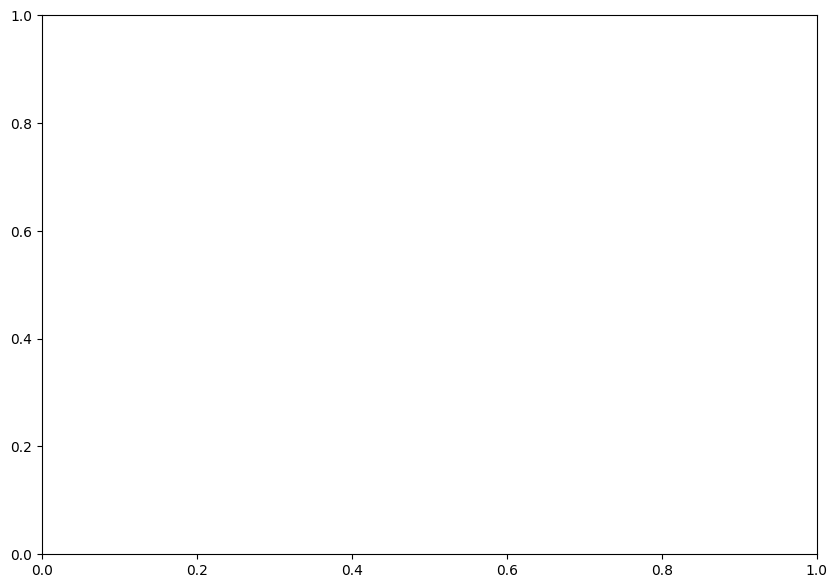

In [63]:

plt.figure(figsize=(10,7))
plt.scatter(xtrain,xtest,marker='*',color='red')

# Degree 3

In [ ]:
poly = PolynomialFeatures(degree=3) # polynomial regression with degree 2 
X_poly_deg3 = poly.fit_transform(x)

In [ ]:
X_poly_deg3.shape

In [ ]:
xtrain, xtest, ytrain, ytest = train_test_split(X_poly_deg3, y, test_size=0.25, random_state=0)

In [ ]:
model2 = LinearRegression()
model2.fit(xtrain, ytrain)

In [ ]:
model2.score(xtest, ytest) # testing

In [ ]:
model2.score(xtrain, ytrain) # training

# Let's talk about Regularization

In [ ]:
x = df.drop(['Profit','Area'], axis=1) 
y = df[['Profit']] 

In [ ]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.25, random_state=0)

In [ ]:
xtrain.head()

# L1 Regularization with LR - Lasso

In [ ]:
lasso_model = Lasso()
lasso_model.fit(xtrain, ytrain)

# L2 Regularization with LR - Ridge

In [ ]:
ridge_model = Ridge() 
ridge_model.fit(xtrain, ytrain)

# Performance

In [ ]:
lasso_predictions = lasso_model.predict(xtest)
lasso_mse = mean_squared_error(ytest, lasso_predictions)

ridge_predictions = ridge_model.predict(xtest)
ridge_mse = mean_squared_error(ytest, ridge_predictions)

print('Lasso MSE:', lasso_mse)
print('Ridge MSE:', ridge_mse)

In [ ]:
lasso_model.score(xtest, ytest)

In [ ]:
ridge_model.score(xtest, ytest)

In [ ]:
0.8744319145336104

In [ ]:
recall -> 
1st class -> linear regression 
2nd -> LR with gradient descent  
3rd -> linear relationship and non-linear relationship 